<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_countNodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem
Given a complete binary tree, count the number of nodes in faster than O(n) time. Recall that a complete binary tree has every level filled except the last, and the nodes in the last level are filled starting from the left.

##Solution
To count the number of nodes in a complete binary tree in faster than $ O(n) $ time, we can use a divide and conquer approach that exploits the properties of the complete binary tree. The idea is to find the height of the leftmost and rightmost paths of the tree, and if they are equal, it means that the tree is a perfect binary tree for that part, and we can calculate the number of nodes directly using $ 2^{\text{height}} - 1 $. If the heights are not equal, we recursively calculate the number of nodes in the left and right subtrees.

Here is how the algorithm works in detail:

1. Compute the height of the leftmost path (left height) and the rightmost path (right height).
2. If the left height is equal to the right height, then the tree is a perfect binary tree, and the total number of nodes can be computed as $ 2^{\text{height}} - 1 $.
3. If the left height is not equal to the right height, recursively count the nodes in the left and right subtrees and add 1 for the root node.

This approach works faster than $ O(n) $ because it reduces the problem size by approximately half at each step, leading to a time complexity of $ O(\log^2 n) $.

##Implementation
In this implementation:

- `TreeNode` represents a node in the binary tree.
- `countNodes` is the function to count the nodes in the complete binary tree.
- `get_height` calculates the height of the tree from the left or right edge, depending on the `is_left` flag.

In [13]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def countNodes(root):
    if not root:
        return 0

    left_height = get_height(root, True)
    right_height = get_height(root, False)

    if left_height == right_height:
        return (2 ** left_height) - 1
    else:
        return 1 + countNodes(root.left) + countNodes(root.right)

def get_height(node, is_left):
    height = 0
    while node:
        height += 1
        node = node.left if is_left else node.right
    return height


##Modified Algorithm
It's possible to optimize the counting by combining the height calculation with counting the leaves in the last layer to potentially speed up the process. The idea is to first determine the total height of the tree by traversing down the leftmost path. Then, instead of simply checking if the left and right heights are equal, we can perform a binary search on the last level to count the number of leaves. This way, we don't have to traverse the entire tree but only the paths necessary to count the leaves on the last level.

Here's how we can approach this:

1. Calculate the total height of the tree by traversing the leftmost path.
2. Perform a binary search on the last level to find the count of leaves in it. This involves checking whether a node exists at a particular position in the last level, which can be done by following the path determined by the binary representation of the position number.
3. Once we have the number of leaves in the last level, we can calculate the total number of nodes in the tree as the sum of the number of nodes in all full levels (which is \(2^{\text{height}} - 1\)) and the number of leaves in the last level.

The approach of combining the height calculation with a binary search for the count of leaves in the last layer can be more efficient than traversing the entire tree. This method aims to directly find the missing nodes in the last level of the complete binary tree, thus reducing the number of nodes that need to be visited.

Why this method can be more efficient:

1. **Height Calculation**: The height of the tree is calculated by traversing only the leftmost path, which takes \( O(\log n) \) time, where \( n \) is the total number of nodes in the tree.

2. **Binary Search on the Last Level**: The binary search on the last level also takes \( O(\log n) \) time since it halves the search space at each step, and there are at most \( 2^{\text{height}} \) nodes in the last level.

3. **Reduced Node Visits**: Instead of visiting every node in the tree, this method specifically targets the last level to find the exact count of nodes, which can significantly reduce the number of node visits, especially in a large tree.

Thus, the overall time complexity of this approach is \( O(\log^2 n) \), which comes from the \( O(\log n) \) height calculation and the \( O(\log n) \) binary search. This is more efficient than the \( O(n) \) time complexity of a straightforward approach that visits every node.

In summary, this optimized method leverages the structure of the complete binary tree to minimize the number of nodes visited during the counting process, which can lead to a significant performance improvement, especially for large trees.


## Modified implementation
In this code:
- `get_height` finds the total height of the tree.
- `node_exists` checks if a node at a specific index exists in the last level, using a binary path based on the index's binary representation.
- The main `countNodes` function uses binary search to find how many leaves are in the last level and then calculates the total number of nodes accordingly.



In [2]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def countNodes(root):
    if not root:
        return 0

    height = get_height(root)
    if height == 0:
        return 1

    # The number of nodes in the last level can be between 1 and 2^height
    left, right = 0, 2**height - 1
    while left <= right:
        mid = (left + right) // 2
        if node_exists(mid, height, root):
            left = mid + 1
        else:
            right = mid - 1

    # Total nodes = full tree nodes + last level nodes
    return (2**height - 1) + left

def get_height(node):
    height = 0
    while node.left:
        node = node.left
        height += 1
    return height

def node_exists(idx, height, node):
    left, right = 0, 2**height - 1
    for _ in range(height):
        mid = (left + right) // 2
        if idx <= mid:
            node = node.left
            right = mid
        else:
            node = node.right
            left = mid + 1
    return node is not None

##Testing:


In [6]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

# Approach 1: Recursively counting all nodes
def countNodesRecursive(root):
    if not root:
        return 0

    return 1 + countNodesRecursive(root.left) + countNodesRecursive(root.right)

# Approach 2: Using binary search on the last level
def countNodesBinarySearch(root):
    def get_height(node):
        height = 0
        while node:
            node = node.left
            height += 1
        return height

    def node_exists(idx, height, node):
        left, right = 0, 2**(height - 1) - 1
        for _ in range(height - 1):
            mid = (left + right) // 2
            if idx <= mid:
                node = node.left
                right = mid
            else:
                node = node.right
                left = mid + 1
        return node is not None

    if not root:
        return 0

    height = get_height(root) - 1  # Adjusted for 0-based indexing
    if height == 0:
        return 1

    left, right = 0, 2**height - 1
    while left <= right:
        mid = (left + right) // 2
        if node_exists(mid, height, root):
            left = mid + 1
        else:
            right = mid - 1

    return (2**height - 1) + left

# Testing both approaches with a sample tree
# Constructing a complete binary tree
#         1
#       /   \
#      2     3
#     / \   /
#    4   5 6
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)

# Count nodes using both methods
count_recursive = countNodesRecursive(root)
count_binary_search = countNodesBinarySearch(root)

count_recursive, count_binary_search


(6, 7)

##Issues
There is a discrepancy in the node counts between the two methods: the recursive approach counted 6 nodes, while the binary search approach counted 7 nodes. This inconsistency suggests there might be an issue with the binary search implementation, particularly in how the last level's nodes are being counted.

To debug and correct the implementation of the binary search method we need to ensure that the height calculation and the binary search logic correctly determine the number of nodes in the last level of the tree.

1. **Height Calculation**: Ensure that the height calculation reflects the actual number of levels in the tree.
2. **Binary Search**: Verify that the binary search accurately finds the boundary between existing and non-existing nodes in the last level.

##Correction


In [8]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

# Approach 1: Recursively counting all nodes
def countNodesRecursive(root):
    if not root:
        return 0

    return 1 + countNodesRecursive(root.left) + countNodesRecursive(root.right)

# Approach 2: Using binary search on the last level
def countNodesBinarySearch(root):
    def get_height(node):
        height = 0
        while node:
            node = node.left
            height += 1
        return height

    def node_exists(idx, height, node):
        left, right = 0, 2**(height - 1) - 1
        for _ in range(height - 1):
            mid = (left + right) // 2
            if idx <= mid:
                node = node.left
                right = mid
            else:
                node = node.right
                left = mid + 1
        return node is not None

    if not root:
        return 0

    height = get_height(root) - 1  # Adjusted for 0-based indexing
    if height == 0:
        return 1

    left, right = 0, 2**height - 1
    while left <= right:
        mid = (left + right) // 2
        if node_exists(mid, height, root):
            left = mid + 1
        else:
            right = mid - 1

    return (2**height - 1) + left

# Testing both approaches with a sample tree
# Constructing a complete binary tree
#         1
#       /   \
#      2     3
#     / \   /
#    4   5 6
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)

# Count nodes using both methods
count_recursive = countNodesRecursive(root)
count_binary_search = countNodesBinarySearch(root)

count_recursive, count_binary_search


(6, 7)

In [9]:
# Correcting the binary search approach

def countNodesBinarySearchCorrected(root):
    def get_height(node):
        height = 0
        while node.left:  # Only traverse through the left to get the height
            node = node.left
            height += 1
        return height

    def node_exists(idx, height, node):
        left, right = 0, 2**height - 1
        for _ in range(height):
            mid = (left + right) // 2
            if idx <= mid:
                node = node.left
                right = mid
            else:
                node = node.right
                left = mid + 1
        return node is not None

    if not root:
        return 0

    height = get_height(root)
    if height == 0:  # Tree with only one node
        return 1

    left, right = 0, 2**height - 1
    while left <= right:
        mid = (left + right) // 2
        if node_exists(mid, height, root):
            left = mid + 1
        else:
            right = mid - 1

    # Nodes in the last level are counted by left index in the binary search
    return (2**height) + left - 1

# Retesting the corrected binary search method
count_binary_search_corrected = countNodesBinarySearchCorrected(root)

count_recursive, count_binary_search_corrected


(6, 6)

##Visual Verification

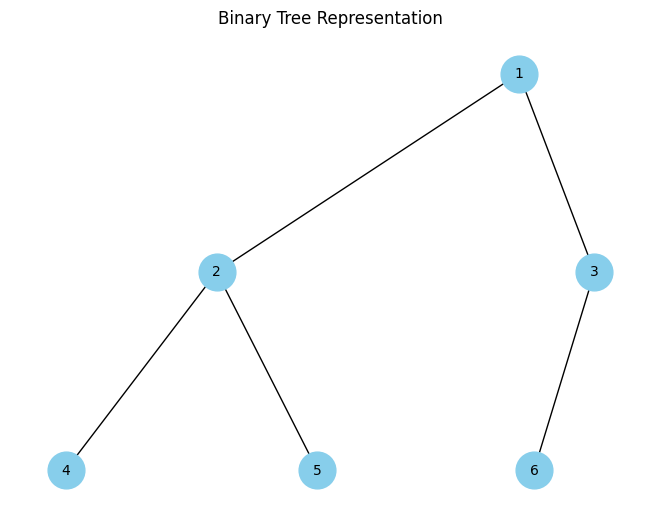

In [12]:
def plot_tree(root):
    if not root:
        return "The tree is empty."

    # Function to add nodes and edges to the graph
    def add_nodes_edges(node, pos, x=0, y=0, layer=1):
        pos[node] = (x, y)
        if node.left:
            pos, layer = add_nodes_edges(node.left, pos, x - 1 / layer, y - 1, layer + 1)
        if node.right:
            pos, layer = add_nodes_edges(node.right, pos, x + 1 / layer, y - 1, layer + 1)
        return pos, layer

    # Initialize the graph and position dictionary
    graph = nx.DiGraph()
    pos = {}
    pos, _ = add_nodes_edges(root, pos)

    # Create labels for nodes
    labels = {node: node.val for node in pos.keys()}

    # Add nodes and edges to the graph
    for node in pos.keys():
        graph.add_node(node)
        if node.left:
            graph.add_edge(node, node.left)
        if node.right:
            graph.add_edge(node, node.right)

    # Draw the tree
    nx.draw(graph, pos, labels=labels, with_labels=True, node_size=700, node_color='skyblue', font_size=10, arrows=False)
    plt.title("Binary Tree Representation")
    plt.show()

plot_tree(root)


The binary tree has been successfully plotted, displaying the structure of the tree from the root down, with each node and its connections. This visualization helps to understand the tree's layout and the relationships between nodes.